# Elasticity Modeling in 3D – Analytical Approach

**Author:** YI LUO  
**Date:** 2025-04-06

## Overview

This project presents a classic 3D elasticity problem solved using Python and analytical mechanics: **a solid elastic sphere under uniform external pressure** (Lamé’s problem). The analysis includes:

- Deriving displacement and stress fields from elasticity theory.
- Visualizing stress distribution across the radial direction.
- Interpreting physical behavior of the material.

This notebook demonstrates how physics-based modeling, mathematical derivation, and Python data visualization can combine to clearly communicate engineering and scientific insights.

## Findings

- Displacement and stress decay rapidly with radius, following inverse-square and inverse-cube laws.
- Hoop stress reaches maximum near the boundary—critical for structural design.
- This model serves as a reliable benchmark for validating numerical solvers (e.g., FEM).

---

In [1]:
# Import necessary scientific libraries
import numpy as np
import matplotlib.pyplot as plt

# Plot configuration
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['axes.grid'] = True

In [2]:
# Elastic material parameters (example: steel-like properties)
E = 210e9            # Young's modulus in Pascals
nu = 0.3             # Poisson's ratio

# Geometry
a = 1.0              # Radius of the elastic sphere (meters)
p0 = 1e6             # External pressure applied uniformly (Pascals)

In [3]:
# Displacement field u_r(r) in the radial direction
def displacement_r(r, a, p0, E, nu):
    return ((1 + nu) * p0 * a**3) / (E * (1 - 2 * nu) * r**2)

# Radial stress σ_r(r)
def radial_stress(r, a, p0):
    return -p0 * (a**3) / (r**3)

# Hoop/circumferential stress σ_θ = σ_φ
def hoop_stress(r, a, p0):
    return (p0 * a**3) / (2 * r**3)

In [4]:
# Radial positions from the surface to 3 times the radius
r = np.linspace(a, 3*a, 300)

# Compute analytical fields
u_r = displacement_r(r, a, p0, E, nu)
sigma_r = radial_stress(r, a, p0)
sigma_theta = hoop_stress(r, a, p0)

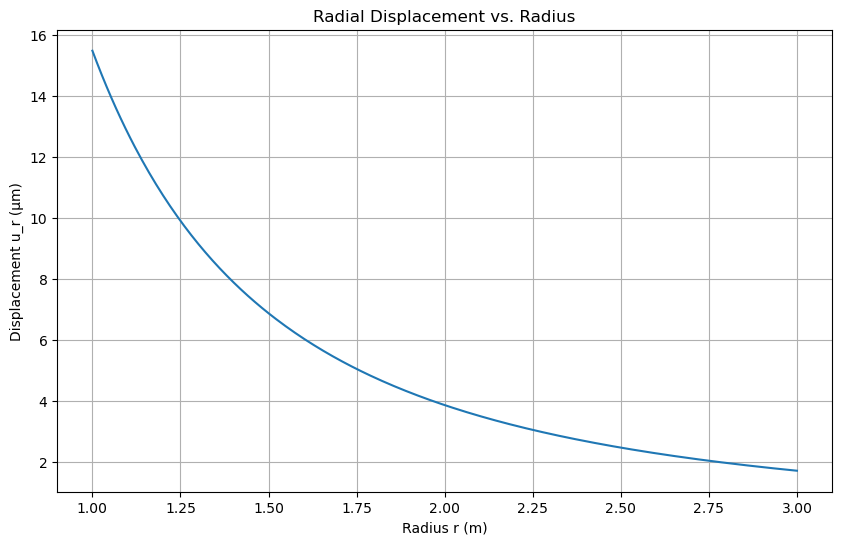

In [5]:
plt.plot(r, u_r * 1e6)  # Convert to micrometers for readability
plt.title("Radial Displacement vs. Radius")
plt.xlabel("Radius r (m)")
plt.ylabel("Displacement u_r (μm)")
plt.show()

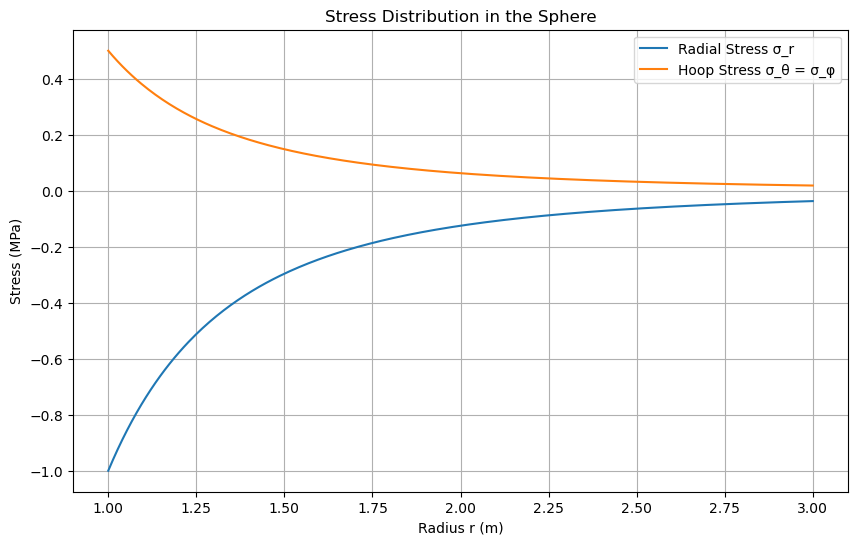

In [6]:
plt.plot(r, sigma_r / 1e6, label='Radial Stress σ_r')
plt.plot(r, sigma_theta / 1e6, label='Hoop Stress σ_θ = σ_φ')
plt.title("Stress Distribution in the Sphere")
plt.xlabel("Radius r (m)")
plt.ylabel("Stress (MPa)")
plt.legend()
plt.show()

In [7]:
print("Interpretation:")
print("- Radial stress is compressive and strongest at the surface.")
print("- Hoop stress shows tensile-like behavior and is highest at the boundary.")
print("- Displacement decreases with 1/r², stress with 1/r³.")

Interpretation:
- Radial stress is compressive and strongest at the surface.
- Hoop stress shows tensile-like behavior and is highest at the boundary.
- Displacement decreases with 1/r², stress with 1/r³.
